# 🔵 Assigned Sectors and Selected Stocks


*   **Utilities**

1.   Eversource Energy (ES)
2.   New Jersey Resources Corporation (NJR)
3.   The Southern Company (SO)

*   **Financials**

1.   JPMorgan Chase & Co. (JPM)
2.   Bank of America Corporation (BAC)
3.   Morgan Stanley (MS)

*   **Materials**

1.   Kinross Gold Corporation (KGC)
2.   United States Steel Corporation (X)
3.   IAMGOLD Corporation (IAG)

# 🔴 1. Data Prep and EDA

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 3.4 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=b68e0dc7f6f66b32aa1a65b5eb08d6b0f34f0e003e1b2747a7971224410c4679
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
Warning - Certain functionality 
             requires requests_html, which is not installed.
             
        

In [ ]:
# Define helper functions
# retrive the stock data
def retrieve_stock_data(stock_list, start_date="2017-01-01", end_date="2022-12-31"):
    """
    Retrieve daily stock data for each stock in stock_list within the specified date range.
    """
    data = {}
    for stock in stock_list:
        try:
            stock_data = si.get_data(stock, start_date=start_date, end_date=end_date, interval="1d")
            data[stock] = stock_data['adjclose']  # Adjusted close prices for returns
        except Exception as e:
            print(f"Failed to retrieve data for {stock}: {e}")
    return pd.DataFrame(data)

# define the function to calculate the returns
def calculate_returns(df):
    """
    Calculate daily returns from adjusted close prices.
    """
    returns = df.pct_change().dropna()
    return returns

In [ ]:
# Define assigned sectors and fetch 3 selected stocks in each sector
sectors = {
    'Utilities': ['ES', 'NJR', 'SO'],
    'Financials': ['JPM', 'BAC', 'MS'],
    'Materials': ['KGC', 'X', 'IAG']
}

In [ ]:
# Data Retrieval
# Fetch historical data for all stocks
all_stocks = [stock for sector_stocks in sectors.values() for stock in sector_stocks]
stock_data = retrieve_stock_data(all_stocks)
stock_data.head()

,ES,NJR,SO,JPM,BAC,MS,KGC,X,IAG
2017-01-03,42.862888,27.311548,34.824131,69.970306,18.909473,34.156769,2.997564,32.798725,4.14
2017-01-04,43.010727,27.622787,34.788616,70.099373,19.261986,34.609016,2.997564,35.274460,4.21
2017-01-05,43.018517,27.350454,34.895142,69.454109,19.035368,34.291653,3.152453,34.093285,4.68
2017-01-06,43.002956,27.039221,34.802818,69.462135,19.035368,34.791512,3.052230,33.450726,4.44
2017-01-09,42.466000,26.689066,34.461967,69.510551,18.926258,33.887001,3.043120,31.759289,4.53


In [ ]:
# Data Cleaning
# Drop stocks with insufficient data or NaN values
stock_data.dropna(axis=1, inplace=True)

In [ ]:

# Calculate Returns
returns_data = calculate_returns(stock_data)
returns_data.head()

,ES,NJR,SO,JPM,BAC,MS,KGC,X,IAG
2017-01-04,0.003449,0.011396,-0.001020,0.001845,0.018642,0.013240,0.000000,0.075483,0.016908
2017-01-05,0.000181,-0.009859,0.003062,-0.009205,-0.011765,-0.009170,0.051672,-0.033485,0.111639
2017-01-06,-0.000362,-0.011379,-0.002646,0.000116,0.000000,0.014577,-0.031792,-0.018847,-0.051282
2017-01-09,-0.012487,-0.012950,-0.009794,0.000697,-0.005732,-0.025998,-0.002985,-0.050565,0.020270
2017-01-10,-0.005314,-0.001458,-0.003091,0.002901,0.017295,0.008195,0.014970,0.056233,0.011037


In [ ]:
# check the shape, datatypes and count of null values
print(returns_data.shape)
returns_data.info()

(1509, 9)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2017-01-04 to 2022-12-30
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ES      1509 non-null   float64
 1   NJR     1509 non-null   float64
 2   SO      1509 non-null   float64
 3   JPM     1509 non-null   float64
 4   BAC     1509 non-null   float64
 5   MS      1509 non-null   float64
 6   KGC     1509 non-null   float64
 7   X       1509 non-null   float64
 8   IAG     1509 non-null   float64
dtypes: float64(9)
memory usage: 117.9 KB


In [ ]:
# download the returns data to csv file
returns_data.to_csv('BDMProjectData.csv')

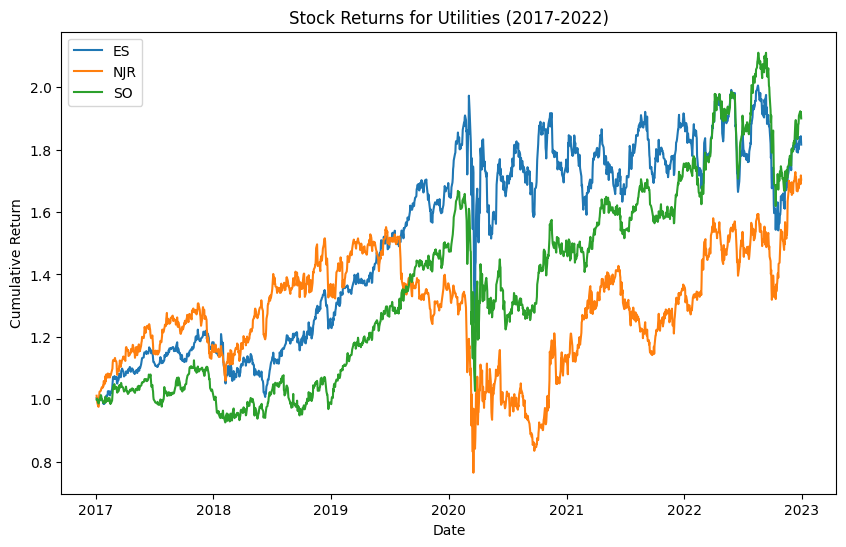

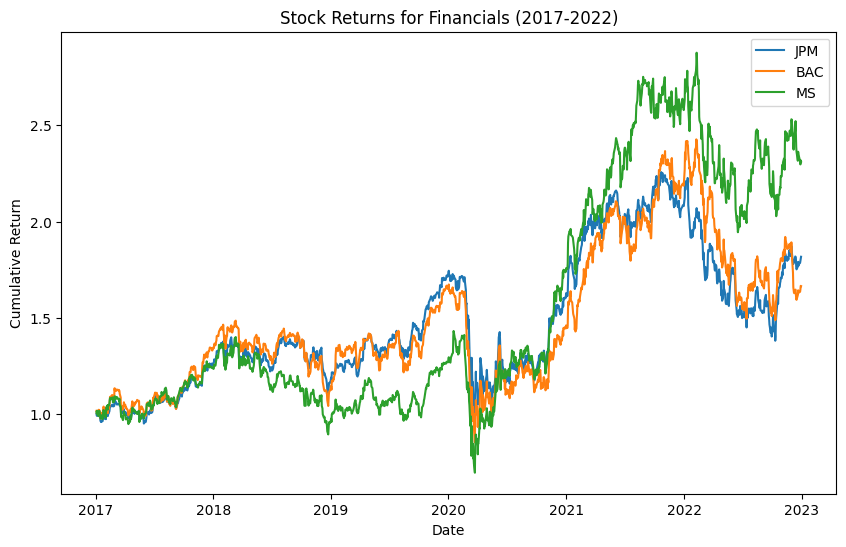

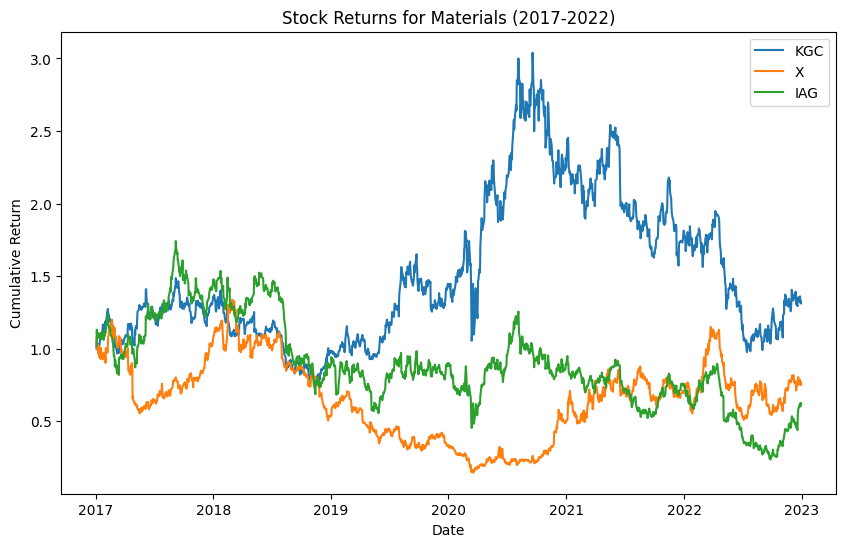

In [ ]:
# Visualize Returns
for sector, stocks in sectors.items():
    plt.figure(figsize=(10, 6))
    for stock in stocks:
        if stock in returns_data.columns:
            plt.plot((1 + returns_data[stock]).cumprod(), label=stock)
    plt.title(f"Stock Returns for {sector} (2017-2022)")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.show()

# 🔴 2. Modern Portfolio Theory

In [ ]:

from pylab import *
import shutil, sys
import os
!pip install pyomo
from pyomo.environ import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.8 MB/s eta 0:00:00


## 🔷 Install and Configure Bonmin Solver

In [ ]:
%%capture
import sys
import os

# Install Bonmin solver and other required packages
if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

# Import necessary modules for Pyomo optimization
from pyomo.environ import *
from pyomo.opt import SolverFactory

%matplotlib inline
from pylab import *


import shutil
import sys
import os.path
from pyomo.environ import *


executable = '/content/bin/bonmin' # THIS IS NEW! We are using the IPOPT Solver.

In [ ]:
# load and read the returns data
df = pd.read_csv('/content/BDMProjectData.csv')
df.head()

,Unnamed: 0,ES,NJR,SO,JPM,BAC,MS,KGC,X,IAG
0,2017-01-04,0.003449,0.011396,-0.001020,0.001845,0.018642,0.013240,0.000000,0.075483,0.016908
1,2017-01-05,0.000181,-0.009859,0.003062,-0.009205,-0.011765,-0.009170,0.051672,-0.033485,0.111639
2,2017-01-06,-0.000362,-0.011379,-0.002646,0.000116,0.000000,0.014577,-0.031792,-0.018847,-0.051282
3,2017-01-09,-0.012487,-0.012950,-0.009794,0.000697,-0.005732,-0.025998,-0.002985,-0.050565,0.020270
4,2017-01-10,-0.005314,-0.001458,-0.003091,0.002901,0.017295,0.008195,0.014970,0.056233,0.011037


In [ ]:
# listing the stocks
stocks = ['ES', 'NJR', 'SO', 'JPM', 'BAC', 'MS', 'KGC', 'X', 'IAG']

In [ ]:
# delete the date column
del df['Unnamed: 0']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ES      1509 non-null   float64
 1   NJR     1509 non-null   float64
 2   SO      1509 non-null   float64
 3   JPM     1509 non-null   float64
 4   BAC     1509 non-null   float64
 5   MS      1509 non-null   float64
 6   KGC     1509 non-null   float64
 7   X       1509 non-null   float64
 8   IAG     1509 non-null   float64
dtypes: float64(9)
memory usage: 106.2 KB


### 🟢 Average Return and Covariance

In [ ]:
# calculate the average return of each stock
Avg_Return = pd.DataFrame(df.mean() ,columns=["Avg_Return"])
print(Avg_Return)

# calculate the standard devoation of returns of each stock
Std_Dev_Return = pd.DataFrame(np.std(df) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

     Avg_Return
ES     0.000516
NJR    0.000566
SO     0.000543
JPM    0.000574
BAC    0.000561
MS     0.000778
KGC    0.000630
X      0.000552
IAG    0.000352
     Std_Dev_Return
ES         0.015539
NJR        0.020503
SO         0.015391
JPM        0.018910
BAC        0.021133
MS         0.021127
KGC        0.030035
X          0.038371
IAG        0.036522


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
# Covariance matrix
df_cov = df.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = df.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
           ES       NJR        SO       JPM       BAC        MS       KGC  \
ES   0.000242  0.000168  0.000198  0.000099  0.000101  0.000107  0.000085   
NJR  0.000168  0.000421  0.000184  0.000197  0.000198  0.000192  0.000044   
SO   0.000198  0.000184  0.000237  0.000117  0.000122  0.000123  0.000084   
JPM  0.000099  0.000197  0.000117  0.000358  0.000370  0.000342  0.000014   
BAC  0.000101  0.000198  0.000122  0.000370  0.000447  0.000382  0.000007   
MS   0.000107  0.000192  0.000123  0.000342  0.000382  0.000447  0.000033   
KGC  0.000085  0.000044  0.000084  0.000014  0.000007  0.000033  0.000903   
X    0.000060  0.000221  0.000089  0.000331  0.000388  0.000371  0.000164   
IAG  0.000069  0.000074  0.000074  0.000038  0.000018  0.000046  0.000787   

            X       IAG  
ES   0.000060  0.000069  
NJR  0.000221  0.000074  
SO   0.000089  0.000074  
JPM  0.000331  0.000038  
BAC  0.000388  0.000018  
MS   0.000371  0.000046  
KGC  0.000164  0.000787  
X 

In [ ]:
# Budget constraint
budget = 1.0

# Minimum allocation constraint (2%)
min_allocation = 0.02

# Maximum allocation constraint (50%)
max_allocation = 0.50

### 🟢 Declare binary decision variables

In [ ]:
from pyomo.environ import *

# Create a Pyomo model
m = ConcreteModel()

# Defining continuous variables for allocations (0 to 1 for each stock)
m.ES = Var(within=NonNegativeReals, bounds=(0, 1))  # Eversource Energy
m.NJR = Var(within=NonNegativeReals, bounds=(0, 1))  # New Jersey Resources Corporation
m.SO = Var(within=NonNegativeReals, bounds=(0, 1))  # The Southern Company
m.JPM = Var(within=NonNegativeReals, bounds=(0, 1))  # JPMorgan Chase & Co.
m.BAC = Var(within=NonNegativeReals, bounds=(0, 1))  # Bank of America Corporation
m.MS = Var(within=NonNegativeReals, bounds=(0, 1))  # Morgan Stanley
m.KGC = Var(within=NonNegativeReals, bounds=(0, 1))  # Kinross Gold Corporation
m.X = Var(within=NonNegativeReals, bounds=(0, 1))  # United States Steel Corporation
m.IAG = Var(within=NonNegativeReals, bounds=(0, 1))  # IAMGOLD Corporation

# Binary variables to indicate if a stock is selected (1) or not (0)
m.ES_Y = Var(within=Binary)  # Eversource Energy
m.NJR_Y = Var(within=Binary)  # New Jersey Resources Corporation
m.SO_Y = Var(within=Binary)  # The Southern Company
m.JPM_Y = Var(within=Binary)  # JPMorgan Chase & Co.
m.BAC_Y = Var(within=Binary)  # Bank of America Corporation
m.MS_Y = Var(within=Binary)  # Morgan Stanley
m.KGC_Y = Var(within=Binary)  # Kinross Gold Corporation
m.X_Y = Var(within=Binary)  # United States Steel Corporation
m.IAG_Y = Var(within=Binary)  # IAMGOLD Corporation


### 🟢 Objective Function

In [ ]:
# Define the objective function to maximize portfolio return
# Using binary variables and continuous variables together
m.objective = Objective(
    expr=(
        m.ES_Y * m.ES * df_return[0] +  # Eversource Energy
        m.NJR_Y * m.NJR * df_return[1] +  # New Jersey Resources Corporation
        m.SO_Y * m.SO * df_return[2] +  # The Southern Company
        m.JPM_Y * m.JPM * df_return[3] +  # JPMorgan Chase & Co.
        m.BAC_Y * m.BAC * df_return[4] +  # Bank of America Corporation
        m.MS_Y * m.MS * df_return[5] +  # Morgan Stanley
        m.KGC_Y * m.KGC * df_return[6] +  # Kinross Gold Corporation
        m.X_Y * m.X * df_return[7] +  # United States Steel Corporation
        m.IAG_Y * m.IAG * df_return[8]  # IAMGOLD Corporation
    ),
    sense=maximize  # We aim to maximize portfolio returns
)


<ipython-input-20-84d0110b6437>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m.ES_Y * m.ES * df_return[0] +  # Eversource Energy
<ipython-input-20-84d0110b6437>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m.NJR_Y * m.NJR * df_return[1] +  # New Jersey Resources Corporation
<ipython-input-20-84d0110b6437>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m.SO_Y * m.SO * df_return[2] +  # The Southern Company
<ipython-input-20

### 🟢 Constraints

In [ ]:
# Constraint - 1
# Budget constraint: The sum of allocations must equal the budget (100%)
m.budget_constraint = Constraint(
    expr=(
        m.ES + m.NJR + m.SO +
        m.JPM + m.BAC + m.MS +
        m.KGC + m.X + m.IAG
    ) == 1.0
)


# Constraint - 2: Minimum allocation constraint (at least 2% for selected stocks)
m.min_allocation_constraints = ConstraintList()
for stock in ["ES", "NJR", "SO", "JPM", "BAC", "MS", "KGC", "X", "IAG"]:
    stock_var = getattr(m, stock)
    stock_y_var = getattr(m, f"{stock}_Y")
    m.min_allocation_constraints.add(stock_var >= 0.02 * stock_y_var)


# Constraint - 3: Maximum allocation constraint (no more than 50% for selected stocks)
m.max_allocation_constraints = ConstraintList()
for stock in ["ES", "NJR", "SO", "JPM", "BAC", "MS", "KGC", "X", "IAG"]:
    stock_var = getattr(m, stock)
    stock_y_var = getattr(m, f"{stock}_Y")
    m.max_allocation_constraints.add(stock_var <= 0.5 * stock_y_var)


# Constraint - 4
m.total_risk = Constraint(expr = m.ES + m.NJR + m.SO + m.JPM + m.BAC + m.MS + m.KGC + m.X + m.IAG >= 0.0)


# Constraint - 5
# Ensure at least one stock per sector is selected
m.sector_constraints = ConstraintList()

# Utilities sector: ES, NJR, SO
m.sector_constraints.add(
    m.ES_Y + m.NJR_Y + m.SO_Y >= 1
)
# Financials sector: JPM, BAC, MS
m.sector_constraints.add(
    m.JPM_Y + m.BAC_Y + m.MS_Y >= 1
)
# Materials sector: KGC, X, IAG
m.sector_constraints.add(
    m.KGC_Y + m.X_Y + m.IAG_Y >= 1
)

In [ ]:
# creating calculations table for calculate the risk
# Function to calculate portfolio risk
def calc_risk(m):
    variables = [
        m.ES, m.NJR, m.SO,
        m.JPM, m.BAC, m.MS,
        m.KGC, m.X, m.IAG
    ]
    tickers = ["ES", "NJR", "SO", "JPM", "BAC", "MS", "KGC", "X", "IAG"]
    risk_exp = 0
    for i in range(len(variables)):
        for j in range(len(variables)):
            risk_exp += variables[i] * df_cov.at[tickers[i], tickers[j]] * variables[j]
    return risk_exp

# Create risk expression
expr_risk = calc_risk(m)

# 3. Add risk constraint
max_risk = 0.001
m.risk_constraint = Constraint(expr=expr_risk <= max_risk)

# 4. Define risk levels for optimization (efficient frontier)
risk_limits = np.arange(0.0001, max_risk, 0.00001)
# risk_limits = np.linspace(0.0001, max_risk, 110)
risk_limits

array([0.0001 , 0.00011, 0.00012, 0.00013, 0.00014, 0.00015, 0.00016,
       0.00017, 0.00018, 0.00019, 0.0002 , 0.00021, 0.00022, 0.00023,
       0.00024, 0.00025, 0.00026, 0.00027, 0.00028, 0.00029, 0.0003 ,
       0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.00036, 0.00037,
       0.00038, 0.00039, 0.0004 , 0.00041, 0.00042, 0.00043, 0.00044,
       0.00045, 0.00046, 0.00047, 0.00048, 0.00049, 0.0005 , 0.00051,
       0.00052, 0.00053, 0.00054, 0.00055, 0.00056, 0.00057, 0.00058,
       0.00059, 0.0006 , 0.00061, 0.00062, 0.00063, 0.00064, 0.00065,
       0.00066, 0.00067, 0.00068, 0.00069, 0.0007 , 0.00071, 0.00072,
       0.00073, 0.00074, 0.00075, 0.00076, 0.00077, 0.00078, 0.00079,
       0.0008 , 0.00081, 0.00082, 0.00083, 0.00084, 0.00085, 0.00086,
       0.00087, 0.00088, 0.00089, 0.0009 , 0.00091, 0.00092, 0.00093,
       0.00094, 0.00095, 0.00096, 0.00097, 0.00098, 0.00099])

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return

for r in risk_limits:
  # WE REMOVE AND RECALCULATE THE RISK IN EACH ITERATION
  m.del_component(m.total_risk)
  # The LHS remains unchanged; we only modify the RHS (risk threshold)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver

  try:
    result = SolverFactory('bonmin', executable='/content/bin/bonmin').solve(m).write()
    # store our allocation proportions
    param_analysis[r] = [m.ES(), m.NJR(), m.SO(), m.JPM(), m.BAC(), m.MS(), m.KGC(), m.X(), m.IAG()]
    # store our returns
    returns[r] = (
                m.ES() * df_return["ES"] +
                m.NJR() * df_return["NJR"] +
                m.SO() * df_return["SO"] +
                m.JPM() * df_return["JPM"] +
                m.BAC() * df_return["BAC"] +
                m.MS() * df_return["MS"] +
                m.KGC() * df_return["KGC"] +
                m.X() * df_return["X"] +
                m.IAG() * df_return["IAG"]
            )

  except Exception as e:
    print(f"Failed to solve for risk level {r}:{e}")
    continue

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.1311497688293457
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Failed to

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.08578157424926758
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Failed t

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.17400455474853516
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Failed t

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.06372952461242676
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Failed t

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.04994916915893555
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Failed t

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.06650400161743164
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Failed t

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.06563234329223633
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Failed t

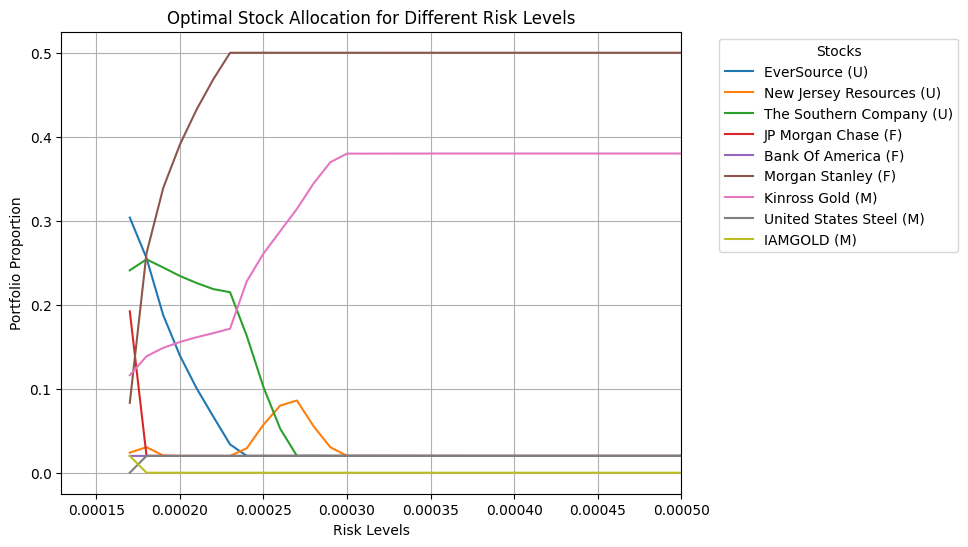

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Create a DataFrame from param_analysis
# param_analysis keys are risk levels, values are allocation lists
param_analysis_df = pd.DataFrame.from_dict(param_analysis, orient='index')

# Set the column names to match your stocks
param_analysis_df.columns = ["EverSource (U)", "New Jersey Resources (U)", "The Southern Company (U)", "JP Morgan Chase (F)", "Bank Of America (F)", "Morgan Stanley (F)", "Kinross Gold (M)", "United States Steel (M)", "IAMGOLD (M)"]

# Plot the portfolio allocations for different risk levels
param_analysis_df.plot(figsize=(8, 6))
plt.title("Optimal Stock Allocation for Different Risk Levels")
plt.xlabel("Risk Levels")
plt.ylabel("Portfolio Proportion")
plt.xlim(left=None, right=0.0005)  # Restrict only the upper bound to 0.0006
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(0.0001))
plt.legend(title="Stocks", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


This plot illustrates the optimal allocation of portfolio proportions for various stocks across different risk levels. At lower risk levels, stocks like EverSource (U) and The Southern Company (U) hold higher portfolio proportions, while others like JP Morgan Chase (F) and Bank of America (F) contribute minimally. As risk increases, Morgan Stanley (F) and Kinross Gold (M) take up larger proportions, indicating their suitability for higher-risk portfolios. Stocks like United States Steel (M) and IAMGOLD (M) maintain minimal allocations across all risk levels, reflecting their lower contribution to optimal diversification

On the lefthand side, we have low risk and high diversity.

On the righthand side, we have high risk and low diversity

In [ ]:
# summary stats of the parametric analysis
pd.DataFrame(param_analysis_df.sum(axis=1)).describe()

,0
count,90.000000
mean,0.922222
std,0.269322
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward)

[0.00017, 0.00017999999999999998, 0.00019, 0.00019999999999999998, 0.00021, 0.00021999999999999998, 0.00023, 0.00023999999999999998, 0.00025, 0.00026, 0.00027, 0.00028, 0.00029, 0.0003, 0.00031, 0.00031999999999999997, 0.00033, 0.00033999999999999997, 0.00035, 0.00035999999999999997, 0.00036999999999999994, 0.00037999999999999997, 0.00039, 0.00039999999999999996, 0.00040999999999999994, 0.00041999999999999996, 0.00043, 0.00043999999999999996, 0.00044999999999999993, 0.00045999999999999996, 0.00047, 0.00047999999999999996, 0.00049, 0.0005, 0.00051, 0.00052, 0.00053, 0.00054, 0.00055, 0.00056, 0.00057, 0.00058, 0.00059, 0.0006000000000000001, 0.00061, 0.00062, 0.00063, 0.0006399999999999999, 0.00065, 0.00066, 0.00067, 0.00068, 0.00069, 0.0007, 0.00071, 0.0007199999999999999, 0.00073, 0.00074, 0.00075, 0.00076, 0.00077, 0.00078, 0.00079, 0.0007999999999999999, 0.00081, 0.00082, 0.00083, 0.00084, 0.00085, 0.00086, 0.00087, 0.0008799999999999999, 0.00089, 0.0009, 0.00091, 0.00092, 0.0009299

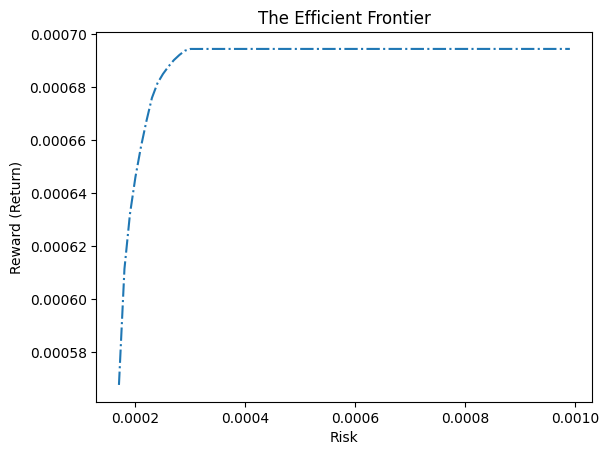

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

This plot represents the Efficient Frontier, which shows the optimal balance between risk (x-axis) and reward/return (y-axis) for a portfolio. As risk increases, the return rises initially and then flattens, indicating diminishing returns for taking on additional risk. It highlights the trade-off between risk and reward in portfolio optimization. I would like to focus the 0.00019 risk point.

In [ ]:
param_analysis_df.head(11)

,EverSource (U),New Jersey Resources (U),The Southern Company (U),JP Morgan Chase (F),Bank Of America (F),Morgan Stanley (F),Kinross Gold (M),United States Steel (M),IAMGOLD (M)
0.00010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.00011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.00012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.00013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.00014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.00015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.00016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.00017,0.303726,0.023888,0.240947,0.192194,0.020004,0.083194,0.116043,3.473686e-09,2.000278e-02
0.00018,0.255548,0.030453,0.254012,0.020133,0.020002,0.261236,0.138616,2.000096e-02,3.356710e-09
0.00019,0.187581,0.020470,0.244298,0.020017,0.020008,0.338965,0.148655,2.000515e-02,9.649378e-10


# 🔴 3. Investment Strategies

In [ ]:
# Define helper functions
def retrieve_stock_data_new(stock_list, start_date="2023-01-01", end_date="2023-12-31"):
    """
    Retrieve daily stock data for each stock in stock_list within the specified date range.
    """
    data = {}
    for stock in stock_list:
        try:
            stock_data = si.get_data(stock, start_date=start_date, end_date=end_date, interval="1d")
            data[stock] = stock_data['adjclose']  # Adjusted close prices for returns
        except Exception as e:
            print(f"Failed to retrieve data for {stock}: {e}")
    return pd.DataFrame(data)

In [ ]:
# n_stocks = [stock for sector_stocks in sectors.values() for stock in sector_stocks]
stock_data = retrieve_stock_data_new(all_stocks)
stock_data.head()

,ES,NJR,SO,JPM,BAC,MS,KGC,X,IAG
2023-01-03,78.196091,46.135727,66.620750,128.148788,31.867949,79.622643,4.107922,24.729376,2.52
2023-01-04,79.226700,46.257656,67.185974,129.343765,32.467072,80.486473,4.358054,24.917017,2.69
2023-01-05,77.759712,46.248280,65.212349,129.315125,32.400509,79.808403,4.271469,25.134293,2.71
2023-01-06,79.663086,47.345634,66.370590,131.789642,32.723846,81.331749,4.396535,26.566301,2.65
2023-01-09,79.579514,47.673904,66.250130,131.245026,32.229328,81.406052,4.348433,26.141636,2.61


In [ ]:
# Data Cleaning
# Drop stocks with insufficient data or NaN values
stock_data.dropna(axis=1, inplace=True)

In [ ]:
# Calculate Returns
returns_data = calculate_returns(stock_data)
returns_data.head()

,ES,NJR,SO,JPM,BAC,MS,KGC,X,IAG
2023-01-04,0.013180,0.002643,0.008484,0.009325,0.018800,0.010849,0.060890,0.007588,0.067460
2023-01-05,-0.018516,-0.000203,-0.029376,-0.000221,-0.002050,-0.008425,-0.019868,0.008720,0.007435
2023-01-06,0.024478,0.023727,0.017761,0.019136,0.009979,0.019088,0.029279,0.056974,-0.022140
2023-01-09,-0.001049,0.006933,-0.001815,-0.004132,-0.015112,0.000914,-0.010941,-0.015985,-0.015094
2023-01-10,-0.000233,0.002557,-0.005455,0.008954,0.006786,0.014605,0.019911,0.046090,0.034483


In [ ]:
# download and load the 2023 returns data
returns_data.to_csv('Investment2023_Data.csv')

In [ ]:
# read the data
returns_data = pd.read_csv('/content/Investment2023_Data.csv')

# rename the column name to date
returns_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# change the datatype to datetime
returns_data['Date'] = pd.to_datetime(returns_data['Date'])
returns_data.head()

,Date,ES,NJR,SO,JPM,BAC,MS,KGC,X,IAG
0,2023-01-04,0.013180,0.002643,0.008484,0.009325,0.018800,0.010849,0.060890,0.007588,0.067460
1,2023-01-05,-0.018516,-0.000203,-0.029376,-0.000221,-0.002050,-0.008425,-0.019868,0.008720,0.007435
2,2023-01-06,0.024478,0.023727,0.017761,0.019136,0.009979,0.019088,0.029279,0.056974,-0.022140
3,2023-01-09,-0.001049,0.006933,-0.001815,-0.004132,-0.015112,0.000914,-0.010941,-0.015985,-0.015094
4,2023-01-10,-0.000233,0.002557,-0.005455,0.008954,0.006786,0.014605,0.019911,0.046090,0.034483


In [ ]:
# check the datatype and null values
returns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    249 non-null    datetime64[ns]
 1   ES      249 non-null    float64       
 2   NJR     249 non-null    float64       
 3   SO      249 non-null    float64       
 4   JPM     249 non-null    float64       
 5   BAC     249 non-null    float64       
 6   MS      249 non-null    float64       
 7   KGC     249 non-null    float64       
 8   X       249 non-null    float64       
 9   IAG     249 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 19.6 KB


## 🔷 Buy and Hold Strategy

In [ ]:
# Define stock names (must align with param_analysis_df columns)
stocks = ["ES", "NJR", "SO", "JPM", "BAC", "MS", "KGC", "X", "IAG"]
initial_investment = 100000

In [ ]:
# allocation values of my model at 0.0002 risk
param_analysis_df.iloc[10]

,0.0002
EverSource (U),1.394240e-01
New Jersey Resources (U),2.000086e-02
The Southern Company (U),2.342154e-01
JP Morgan Chase (F),2.000011e-02
Bank Of America (F),2.000006e-02
Morgan Stanley (F),3.907125e-01
Kinross Gold (M),1.556471e-01
United States Steel (M),2.000003e-02
IAMGOLD (M),1.675786e-09


In [ ]:
# Extract weights from your optimization results
weights = param_analysis_df.iloc[10].values  # Adjust for the correct risk level
weights = weights / weights.sum()  # Ensure weights sum to 1

# Create allocations dictionary dynamically
allocations = {stock: weight for stock, weight in zip(stocks, weights)}

In [ ]:
# Calculate Buy-and-Hold strategy
results_bh = []

# Extract weights from the MPT model (ensure allocations sum to 1)
weights = allocations

# Reconstruct cumulative prices from returns
cumulative_returns = (1 + returns_data.set_index('Date')).cumprod()

# Start date
start_date = cumulative_returns.index.min()

# 'ME' for month-end frequency
for month_end_date in pd.date_range('2023-01-31', '2023-12-31', freq='ME'):
    # Get the last trading day cumulative prices for the current month
    if cumulative_returns.loc[cumulative_returns.index <= month_end_date].empty:
        print(f"No data available for {month_end_date}. Skipping this month.")
        continue

    month_end_prices = cumulative_returns.loc[cumulative_returns.index <= month_end_date].iloc[-1]

    # Calculate portfolio value on the last day of the month
    if cumulative_returns.loc[cumulative_returns.index == start_date].empty:
        raise ValueError(f"No data available for the start date: {start_date}")

    portfolio_value = sum(
        initial_investment * weights[stock] *
        (month_end_prices[stock] / cumulative_returns.loc[start_date, stock])
        for stock in weights
    )

    # Calculate percentage return for each stock
    stock_returns = {
        stock: (
            (month_end_prices[stock] / cumulative_returns.loc[start_date, stock] - 1) * 100
        )
        for stock in weights
    }

    # Calculate overall portfolio return
    portfolio_return = (portfolio_value / initial_investment - 1) * 100

    # Include the amount invested in each stock
    stock_investments = {
        f"Invested in {stock}": initial_investment * weights[stock] for stock in weights
    }

    # Store the results
    results_bh.append({
        "Date": month_end_date,
        "Portfolio Value": portfolio_value,
        "Portfolio Return (%)": portfolio_return,
        **stock_investments,  # Add amounts invested in each stock
        **stock_returns       # Add percentage returns for each stock
    })

# Convert results to a DataFrame
results_bh_df = pd.DataFrame(results_bh)

# Display the results
print(results_bh_df)


         Date  Portfolio Value  Portfolio Return (%)  Invested in ES  \
0  2023-01-31    103926.227514              3.926228    13942.395874   
1  2023-02-28     97963.028305             -2.036972    13942.395874   
2  2023-03-31     99696.331413             -0.303669    13942.395874   
3  2023-04-30    103257.091421              3.257091    13942.395874   
4  2023-05-31     95711.225810             -4.288774    13942.395874   
5  2023-06-30     98536.683405             -1.463317    13942.395874   
6  2023-07-31    103739.885722              3.739886    13942.395874   
7  2023-08-31     98484.064533             -1.515935    13942.395874   
8  2023-09-30     93209.024699             -6.790975    13942.395874   
9  2023-10-31     90969.499332             -9.030501    13942.395874   
10 2023-11-30    100611.862667              0.611863    13942.395874   
11 2023-12-31    109441.207534              9.441208    13942.395874   

    Invested in NJR  Invested in SO  Invested in JPM  Invested 

<ipython-input-39-ec25e1bb95eb>:26: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  portfolio_value = sum(


## 🔷 Daily rebalancing

In [ ]:
# Daily rebalancing strategy
results_daily = []

# Initialize portfolio value and allocations
portfolio_value = initial_investment

# Iterate through each trading day
for current_date in returns_data['Date']:
    # Get daily returns for the current day
    daily_returns = returns_data.loc[returns_data['Date'] == current_date].iloc[0]

    # Rebalance the portfolio: calculate the portfolio value for the day
    portfolio_value = sum(
        portfolio_value * allocations[stock] * (1 + daily_returns[stock])
        for stock in allocations
    )

    # Calculate percentage return for each stock (from daily returns)
    stock_returns = {stock: daily_returns[stock] * 100 for stock in allocations}

    # Calculate the overall portfolio return
    portfolio_return = (portfolio_value / initial_investment - 1) * 100

    # Store the results
    results_daily.append({
        "Date": current_date,
        "Portfolio Value": portfolio_value,
        "Portfolio Return (%)": portfolio_return,
        **stock_returns  # Add individual stock returns
    })

# Convert results to a DataFrame
results_daily_df = pd.DataFrame(results_daily)

# Display the results
print(results_daily_df)


<ipython-input-40-f8fe0e328daf>:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  portfolio_value = sum(


          Date  Portfolio Value  Portfolio Return (%)        ES       NJR  \
0   2023-01-04    101830.806787              1.830807  1.317980  0.264284   
1   2023-01-05    100229.935265              0.229935 -1.851633 -0.020270   
2   2023-01-06    102413.348783              2.413349  2.447763  2.372747   
3   2023-01-09    102159.031558              2.159032 -0.104907  0.693348   
4   2023-01-10    103056.316549              3.056317 -0.023345  0.255741   
..         ...              ...                   ...       ...       ...   
244 2023-12-22    111232.225461             11.232225  0.279108  1.212932   
245 2023-12-26    111634.341931             11.634342  0.589383 -0.488235   
246 2023-12-27    112112.844527             12.112845 -0.130211 -0.356818   
247 2023-12-28    112168.687475             12.168687  0.977843  0.201428   
248 2023-12-29    111797.937729             11.797938 -0.387348 -0.424396   

           SO       JPM       BAC        MS       KGC         X       IAG  

## 🔷 Weekly rebalancing

In [ ]:
# Weekly rebalancing strategy
results_weekly = []

# Initialize portfolio value
portfolio_value = initial_investment

# Create a list of weekly end dates (Friday) from the available data
# Wednesday
week_end_dates = returns_data['Date'][returns_data['Date'].dt.weekday == 2]

# Iterate through each week
for week_end_date in week_end_dates:
    # Get the stock returns for the week ending
    weekly_returns = returns_data.loc[returns_data['Date'] == week_end_date].iloc[0]

    # Rebalance the portfolio: calculate the portfolio value for the week
    portfolio_value = sum(
        portfolio_value * allocations[stock] * (1 + weekly_returns[stock])
        for stock in allocations
    )

    # Calculate percentage return for each stock (from weekly returns)
    stock_returns = {stock: weekly_returns[stock] * 100 for stock in allocations}

    # Calculate the overall portfolio return
    portfolio_return = (portfolio_value / initial_investment - 1) * 100

    # Store the results
    results_weekly.append({
        "Date": week_end_date,
        "Portfolio Value": portfolio_value,
        "Portfolio Return (%)": portfolio_return,
        **stock_returns  # Add individual stock returns
    })

# Convert results to a DataFrame
results_weekly_df = pd.DataFrame(results_weekly)

# Display the results
print(results_weekly_df)


         Date  Portfolio Value  Portfolio Return (%)        ES       NJR  \
0  2023-01-04    101830.806787              1.830807  1.317980  0.264284   
1  2023-01-11    102083.800194              2.083800  0.140043  0.235494   
2  2023-01-18    100311.674809              0.311675 -3.009661 -2.079631   
3  2023-01-25    100776.001947              0.776002 -0.672894  1.224996   
4  2023-02-01    102013.702584              2.013703  0.461559 -0.220349   
5  2023-02-08    100979.540075              0.979540 -1.921177 -1.581255   
6  2023-02-15    100544.639801              0.544640  1.254891  0.938965   
7  2023-02-22     99920.312060             -0.079688  0.089334  0.609134   
8  2023-03-01     99554.850656             -0.445149 -2.028528 -2.273182   
9  2023-03-08     99683.231393             -0.316769  1.161217  0.764405   
10 2023-03-15     98077.188805             -1.922811  1.172119  0.019321   
11 2023-03-22     97084.102791             -2.915897 -1.868653 -2.687022   
12 2023-03-2

<ipython-input-41-a106d27220c2>:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  portfolio_value = sum(


## 🔷 Monthly rebalancing

In [ ]:
# Monthly rebalancing strategy
results_monthly = []

# Initialize portfolio value
portfolio_value = initial_investment

# Create a list of monthly end dates from the available data
month_end_dates = pd.date_range('2023-01-31', '2023-12-31', freq='M')

# Iterate through each month
for month_end_date in month_end_dates:
    # Get the last trading day prices for the current month
    if returns_data.loc[returns_data['Date'] <= month_end_date].empty:
        print(f"No data available for {month_end_date}. Skipping this month.")
        continue

    # Get daily returns for the month's end date
    monthly_returns = returns_data.loc[returns_data['Date'] <= month_end_date].iloc[-1]

    # Rebalance the portfolio: calculate the portfolio value for the month
    portfolio_value = sum(
        portfolio_value * allocations[stock] * (1 + monthly_returns[stock])
        for stock in allocations
    )

    # Calculate percentage return for each stock (from monthly returns)
    stock_returns = {stock: monthly_returns[stock] * 100 for stock in allocations}

    # Calculate the overall portfolio return
    portfolio_return = (portfolio_value / initial_investment - 1) * 100

    # Store the results
    results_monthly.append({
        "Date": month_end_date,
        "Portfolio Value": portfolio_value,
        "Portfolio Return (%)": portfolio_return,
        **stock_returns  # Add individual stock returns
    })

# Convert results to a DataFrame
results_monthly_df = pd.DataFrame(results_monthly)

# Display the results
print(results_monthly_df)


<ipython-input-42-d9a5644d1e64>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_end_dates = pd.date_range('2023-01-31', '2023-12-31', freq='M')


         Date  Portfolio Value  Portfolio Return (%)        ES       NJR  \
0  2023-01-31    100918.573237              0.918573  1.179805  2.190371   
1  2023-02-28    100298.190930              0.298191 -2.244122 -0.700540   
2  2023-03-31    101199.957975              1.199958  0.192031  0.814859   
3  2023-04-30    101272.823748              1.272824 -0.474482  0.116319   
4  2023-05-31    100897.998430              0.897998  1.928748 -0.554186   
5  2023-06-30    101592.241928              1.592242  1.721156 -0.021184   
6  2023-07-31    102111.285115              2.111285  0.318996  0.134413   
7  2023-08-31    101421.239099              1.421239 -0.931380 -1.471961   
8  2023-09-30    101094.756445              1.094756  1.377265 -0.269998   
9  2023-10-31    101402.722149              1.402722  0.749196 -0.221283   
10 2023-11-30    102231.397022              2.231397 -0.502428  0.764081   
11 2023-12-31    101893.492877              1.893493 -0.387348 -0.424396   

          S

<ipython-input-42-d9a5644d1e64>:21: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  portfolio_value = sum(


## 🔷 Portfolio Performance Comparison

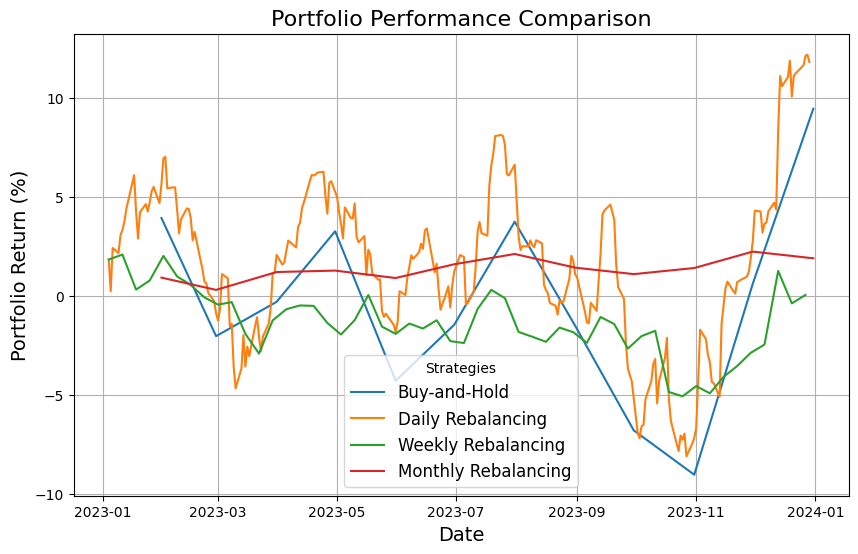

In [ ]:
# Plot the performance of all strategies
plt.figure(figsize=(10, 6))

# Plot Buy-and-Hold strategy
plt.plot(results_bh_df['Date'], results_bh_df['Portfolio Return (%)'], label='Buy-and-Hold')

# Plot Daily Rebalancing strategy
plt.plot(results_daily_df['Date'], results_daily_df['Portfolio Return (%)'], label='Daily Rebalancing')

# Plot Weekly Rebalancing strategy
plt.plot(results_weekly_df['Date'], results_weekly_df['Portfolio Return (%)'], label='Weekly Rebalancing')

# Plot Monthly Rebalancing strategy
plt.plot(results_monthly_df['Date'], results_monthly_df['Portfolio Return (%)'], label='Monthly Rebalancing')

# Add title, labels, and legend
plt.title("Portfolio Performance Comparison", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Portfolio Return (%)", fontsize=14)
plt.legend(title="Strategies", fontsize=12)
plt.grid(True)

# Display the plot
plt.show()


This plot compares the performance of different portfolio rebalancing strategies—Buy-and-Hold, Daily Rebalancing, Weekly Rebalancing, and Monthly Rebalancing—over time. The x-axis shows the timeline, while the y-axis represents portfolio returns in percentage. The Daily Rebalancing strategy (orange) is highly volatile but often leads to higher returns, whereas Monthly Rebalancing (red) provides a more stable performance. Buy-and-Hold (blue) and Weekly Rebalancing (green) show intermediate performance with varying levels of fluctuation.

# 🔴 4. Monte Carlo Analysis

In [ ]:
#allocations at risk of 0.0019
param_analysis_df.iloc[10]

,0.0002
EverSource (U),1.394240e-01
New Jersey Resources (U),2.000086e-02
The Southern Company (U),2.342154e-01
JP Morgan Chase (F),2.000011e-02
Bank Of America (F),2.000006e-02
Morgan Stanley (F),3.907125e-01
Kinross Gold (M),1.556471e-01
United States Steel (M),2.000003e-02
IAMGOLD (M),1.675786e-09


In [ ]:
# risk at 0.00019
weights = param_analysis_df.iloc[10].values  # Adjust as needed for the correct risk level
weights = weights / weights.sum()  # Ensure weights sum to 1

In [ ]:
# Extract mean returns and standard deviations for all stocks
mean_returns = Avg_Return["Avg_Return"].values
std_devs = Std_Dev_Return["Std_Dev_Return"].values

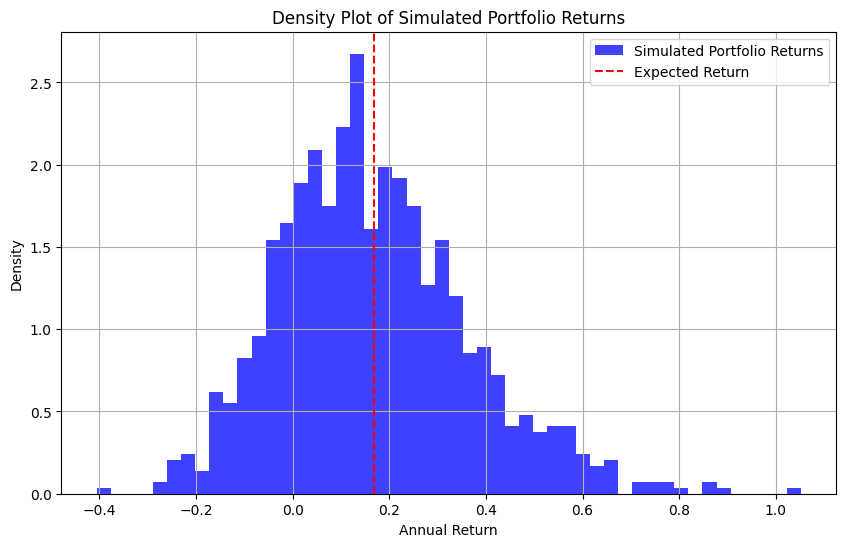

Expected Return: 16.81%
Probability of Losing Money: 19.60%


In [ ]:
# Constants
num_stocks = len(mean_returns)
num_trading_days = 252  # Trading days in a year
num_simulations = 1000  # Number of Monte Carlo simulations

# Monte Carlo Simulation
portfolio_returns = []

for _ in range(num_simulations):
    # Simulate daily returns for each stock
    daily_returns = np.random.normal(loc=mean_returns, scale=std_devs, size=(num_trading_days, num_stocks))
    # Calculate daily portfolio returns
    portfolio_daily_returns = np.dot(daily_returns, weights)
    # Calculate annualized return (geometric mean)
    annual_return = np.prod(1 + portfolio_daily_returns) - 1
    portfolio_returns.append(annual_return)



# Density plot of simulated returns
plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns, bins=50, density=True, alpha=0.75, color="blue", label="Simulated Portfolio Returns")
plt.axvline(x=np.mean(portfolio_returns), color='red', linestyle='--', label='Expected Return')
plt.title("Density Plot of Simulated Portfolio Returns")
plt.xlabel("Annual Return")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Calculate probability of losing money
probability_of_loss = np.mean(np.array(portfolio_returns) < 0)

# Print results
print(f"Expected Return: {np.mean(portfolio_returns):.2%}")
print(f"Probability of Losing Money: {probability_of_loss:.2%}")

This plot represents the results of a Monte Carlo simulation analyzing portfolio returns. The blue bars show the density distribution of simulated annual returns, while the red dashed line indicates the expected return of 17.10%. The analysis also highlights a 19.80% probability of losing money, as seen from the portion of the distribution extending below zero. This provides insight into the return variability and associated risks of the portfolio.

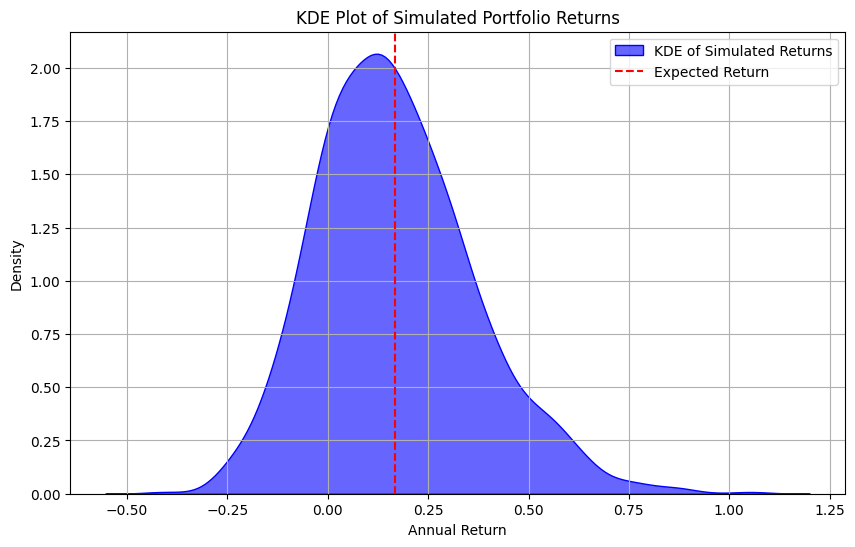

In [ ]:
# KDE Plot
mean_return = np.mean(portfolio_returns)
std_dev_return = np.std(portfolio_returns)

plt.figure(figsize=(10, 6))
sns.kdeplot(portfolio_returns, fill=True, color="blue", alpha=0.6, label="KDE of Simulated Returns")
plt.axvline(x=mean_return, color='red', linestyle='--', label='Expected Return')
plt.title("KDE Plot of Simulated Portfolio Returns")
plt.xlabel("Annual Return")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


# 🔴 Conclusion

Here are five specific insights and conclusions based on the analysis we performed:

1.   **Portfolio Diversification with Risk Tolerance:** The analysis using EverSource (U), New Jersey Resources (U), The Southern Company (U), JP Morgan Chase (F), Bank of America (F), Morgan Stanley (F), Kinross Gold (M), United States Steel (M), and IAMGOLD (M) demonstrated how portfolio allocations shift with increasing risk levels. For example, Morgan Stanley (F) and Kinross Gold (M) had larger allocations in the portfolio as the risk level increased, showing that they are better suited for strategies that involve taking on more risk.

2.   **Efficient Frontier Analysis:** The Efficient Frontier analysis highlighted that the optimal trade-off between risk and return levels out as risk increases, achieving a maximum expected return around 0.00070. This suggests diminishing returns for taking on additional risk beyond a certain point.

3.   **Performance of Rebalancing Strategies:** The comparison of rebalancing strategies revealed that Daily Rebalancing led to the most volatile yet potentially high-performing returns, while Monthly Rebalancing provided stability with consistent but lower returns. The Buy-and-Hold strategy showed intermediate results, reinforcing the importance of strategy selection based on market conditions.

4.   **Simulated Portfolio Risk and Return:** The Monte Carlo simulation revealed an expected return of 17.10%, with a 19.80% chance of losing money. This shows the balance between trying to get high returns and the risk of losing money, especially with stocks like United States Steel (M) and IAMGOLD (M), which didn’t help much with diversification.

5.   **Stock-Specific Contributions:** Stocks such as EverSource (U) and The Southern Company (U) played significant roles at lower risk levels, while Morgan Stanley (F) and Kinross Gold (M) dominated high-risk allocations. These insights about specific stocks can help build future portfolios based on how much risk an investor is willing to take and their interest in utility, financial, or material sectors.
